In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
!pip install -U tensorflow==2.15.0
import tensorflow as tf
tf.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-03-02 10:56:46.405195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 10:56:46.405299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 10:56:46.549063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


'2.15.0'

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

# Divide the dataset into independent and dependent features
X = dataset.iloc[:, 3:13] # Assuming columns from 3 to 12 are features
Y = dataset.iloc[:, 13]   # Assuming column 13 is the target variable

# Convert categorical variables to numeric
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

# Drop the original categorical columns
X = X.drop(['Geography', 'Gender'], axis=1)

# Merge the one-hot encoded columns back
X = pd.concat([X, geography, gender], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Apply StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/100
560/560 [==============================] - 3s 3ms/step - loss: 0.4543 - accuracy: 0.8016 - val_loss: 0.4170 - val_accuracy: 0.8154
Epoch 2/100
560/560 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8250 - val_loss: 0.3886 - val_accuracy: 0.8375
Epoch 3/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8445 - val_loss: 0.3878 - val_accuracy: 0.8342
Epoch 4/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3669 - accuracy: 0.8489 - val_loss: 0.3753 - val_accuracy: 0.8462
Epoch 5/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8525 - val_loss: 0.3666 - val_accuracy: 0.8487
Epoch 6/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8512 - val_loss: 0.3766 - val_accuracy: 0.8429
Epoch 7/100
560/560 [==============================] - 1s 2ms/step - loss: 0.3564 - accuracy: 0.8552 - val_loss: 0.3638 - val_accuracy: 0.8492

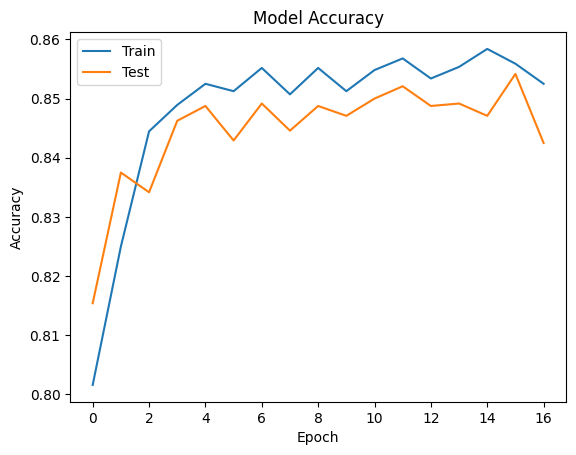

*********
63/63 [==============================] - 0s 1ms/step
[[1521   74]
 [ 205  200]]
*********
Accuracy: 0.8605
*********
weights


In [4]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize the ANN
classifier = Sequential()

# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

# Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))  # Correct dropout syntax

# Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

# Initialize the optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the ANN
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])  # Correct compile syntax

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,  # Adjusted patience to a more reasonable number
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Training the ANN
model_history = classifier.fit(
    X_train, Y_train,
    validation_split=0.3,
    batch_size=10,
    epochs=100,  # Adjusted for demonstration; consider your own case
    callbacks=[early_stopping]
)

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')  # Correct legend location
plt.show()

print('*********')

# Predict the test results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred >= 0.5)

# Make the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print('*********')
    
# Calculate accuracy
score = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {score}')

print('*********')

# To get the weights, you can use:
weights = classifier.get_weights()
print('weights')